In [111]:
from matplotlib import pyplot as plt

In [113]:
import pandas as pd
import seaborn as sns
import numpy as np

In [114]:
%matplotlib inline

In [115]:
df = pd.read_csv('constraints/results/ratios/2017_08_28T13_37_20.csv', 
                 header=0)

df.head()

,no_constraint,constraint,num_enforced_constraints
0,-43.123283,-18.139294,2
1,-37.942902,-16.725777,2
2,-39.571312,-16.087782,2
3,-42.211540,-15.445932,2
4,-50.473736,-27.365368,2


In [193]:
len(df['num_enforced_constraints'].unique())

1

In [202]:
pal = sns.cubehelix_palette(1 +
                            len(df['num_enforced_constraints'].unique()),
                            as_cmap=True,
                            rot=-.5,
                            reverse=False)
pal = sns.dark_palette('seagreen',
                       as_cmap=True,
                       reverse=True)

# pal = pal.as_hex()
pal


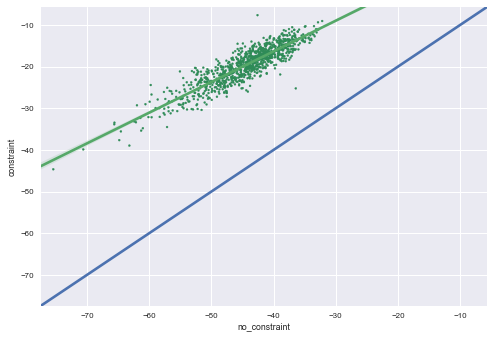

In [203]:
fig, ax = plt.subplots()

xymin = min( min(df['no_constraint']), min(df['constraint'])) - 2
xymax = max( max(df['no_constraint']), max(df['constraint'])) + 2
plt.axis([xymin, xymax, xymin, xymax])

# xmin = min(df['no_constraint']) - 2
# xmax = max(df['no_constraint']) + 2
# 
# ymin = min(df['constraint']) - 2
# ymax = max(df['constraint']) + 2
# 
# plt.axis([xmin, xmax, ymin, ymax])

sns.regplot(x='no_constraint',
            y='no_constraint',
            data=df,
            fit_reg=True,
            marker='',
            ax=ax,
            )

sns.regplot(x='no_constraint',
            y='constraint',
            data=df,
            marker='',
            fit_reg=True,
            ax=ax
            )

ax = ax.scatter(x=df['no_constraint'],
                y=df['constraint'],
                c=df['num_enforced_constraints'],
                s=4,
                cmap=pal)
